# Estimation Obesity Levels Based on Eating Habits and Physical Condition

Goal: To predict obesity risk in individuals

# About the Data

This dataset include data for the estimation of obesity levels in individuals from the countries of Mexico, Peru and Colombia, based on their eating habits and physical condition. The data contains 17 attributes and 2111 records, the records are labeled with the class variable NObesity (Obesity Level), that allows classification of the data using the values of Insufficient Weight, Normal Weight, Overweight Level I, Overweight Level II, Obesity Type I, Obesity Type II and Obesity Type III. 77% of the data was generated synthetically using the Weka tool and the SMOTE filter, 23% of the data was collected directly from users through a web platform..

# Features and Descriptions

| Variable Name | Role | Variable Type | Description | 
| :- | :- | :- | :- |
| Gender | Feature | Categorical | Male or Female | 
| Age | Feature | Integer | Age in years | 
| Height | Feature | Float | Height in meters |
| Weight | Feature | Float | Weight in kilograms |
| family_history_with_overweight | Feature | Categorical | Has a family member suffered or suffers from overweight? |
| FAVC | Feature | Categorical | Do you eat high caloric food frequently? |
| FCVC | Feature | Ordinal | Do you usually eat vegetables in your meals? |
| NCP | Feature | Ordinal | How many main meals do you have daily? |
| CAEC | Feature | Ordinal | Do you eat any food between meals? |
| SMOKE | Feature | Categorical | Do you smoke? |
| CH20 | Feature | Ordinal | How much water do you drink daily? |
| SCC | Feature | Categorical | Do you monitor the calories you eat daily? |
| FAF | Feature | Orindal | How often do you have physical activity? |
| TUE | Feature | Ordinal | How much time do you use technological devices such as cell phone, videogames, television, computer and others? |
| CALC | Feature | Ordinal | How often do you drink alcohol? |
| MTRANS | Feature | Categorical | Which transportation do you usually use? |
| NObeyesdad | Target| Categorical | Obesity Level |

# Import Libraries

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from prettytable import PrettyTable
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Load Data 

In [49]:
df = pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')


# EDA

In [52]:
print(df.head())
print(df.info())
print(df.shape)


   Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
0  Female  21.0    1.62    64.0                            yes   no   2.0   
1  Female  21.0    1.52    56.0                            yes   no   3.0   
2    Male  23.0    1.80    77.0                            yes   no   2.0   
3    Male  27.0    1.80    87.0                             no   no   3.0   
4    Male  22.0    1.78    89.8                             no   no   2.0   

   NCP       CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC  \
0  3.0  Sometimes    no   2.0   no  0.0  1.0          no   
1  3.0  Sometimes   yes   3.0  yes  3.0  0.0   Sometimes   
2  3.0  Sometimes    no   2.0   no  2.0  1.0  Frequently   
3  3.0  Sometimes    no   2.0   no  2.0  0.0  Frequently   
4  1.0  Sometimes    no   2.0   no  0.0  0.0   Sometimes   

                  MTRANS           NObeyesdad  
0  Public_Transportation        Normal_Weight  
1  Public_Transportation        Normal_Weight  
2  Public_Transportation        

In [54]:
def prettify_df(df):
    table = PrettyTable()
    table.field_names = df.columns

    for row in df.values:
        table.add_row(row)
    print(table)

df_copy = df.rename(columns={"family_history_with_overweight":"FHWO"})
tmp = pd.DataFrame(index=df_copy.columns)
tmp['count'] = df_copy.count()
tmp['dtype'] = df_copy.dtypes
tmp['nunique'] = df_copy.nunique()
tmp['%nunique'] = (tmp['nunique']/len(df_copy))*100
tmp['%null'] = (df_copy.isnull().sum()/len(df_copy))*100
tmp['min'] = df_copy.min()
tmp['max'] = df_copy.max()
tmp

tmp.reset_index(inplace=True)
tmp = tmp.rename(columns = {"index":"Column Name"})
tmp = tmp.round(3)
prettify_df(tmp)
del tmp, df_copy

+-------------+-------+---------+---------+----------+-------+---------------------+---------------------+
| Column Name | count |  dtype  | nunique | %nunique | %null |         min         |         max         |
+-------------+-------+---------+---------+----------+-------+---------------------+---------------------+
|    Gender   |  2111 |  object |    2    |  0.095   |  0.0  |        Female       |         Male        |
|     Age     |  2111 | float64 |   1402  |  66.414  |  0.0  |         14.0        |         61.0        |
|    Height   |  2111 | float64 |   1574  |  74.562  |  0.0  |         1.45        |         1.98        |
|    Weight   |  2111 | float64 |   1525  |  72.241  |  0.0  |         39.0        |        173.0        |
|     FHWO    |  2111 |  object |    2    |  0.095   |  0.0  |          no         |         yes         |
|     FAVC    |  2111 |  object |    2    |  0.095   |  0.0  |          no         |         yes         |
|     FCVC    |  2111 | float64 |   8

In [56]:
features = df.drop('NObeyesdad', axis=1)
labels = pd.DataFrame(df['NObeyesdad'])

# Build Numerical DataFrame
mask_numeric = features.dtypes == float
df_numerical = features.loc[:, mask_numeric]

df_numerical


,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
0,21.000000,1.620000,64.000000,2.0,3.0,2.000000,0.000000,1.000000
1,21.000000,1.520000,56.000000,3.0,3.0,3.000000,3.000000,0.000000
2,23.000000,1.800000,77.000000,2.0,3.0,2.000000,2.000000,1.000000
3,27.000000,1.800000,87.000000,3.0,3.0,2.000000,2.000000,0.000000
4,22.000000,1.780000,89.800000,2.0,1.0,2.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...
2106,20.976842,1.710730,131.408528,3.0,3.0,1.728139,1.676269,0.906247
2107,21.982942,1.748584,133.742943,3.0,3.0,2.005130,1.341390,0.599270
2108,22.524036,1.752206,133.689352,3.0,3.0,2.054193,1.414209,0.646288
2109,24.361936,1.739450,133.346641,3.0,3.0,2.852339,1.139107,0.586035


In [14]:
# Build Categorical DataFrame
mask_categorical = features.dtypes != float
df_categorical = features.loc[:, mask_categorical]

for i in range(df_categorical.shape[1]):
    print(df_categorical.iloc[:, i].value_counts())


Gender
Male      1068
Female    1043
Name: count, dtype: int64
family_history_with_overweight
yes    1726
no      385
Name: count, dtype: int64
FAVC
yes    1866
no      245
Name: count, dtype: int64
CAEC
Sometimes     1765
Frequently     242
Always          53
no              51
Name: count, dtype: int64
SMOKE
no     2067
yes      44
Name: count, dtype: int64
SCC
no     2015
yes      96
Name: count, dtype: int64
CALC
Sometimes     1401
no             639
Frequently      70
Always           1
Name: count, dtype: int64
MTRANS
Public_Transportation    1580
Automobile                457
Walking                    56
Motorbike                  11
Bike                        7
Name: count, dtype: int64


In [16]:
df_encoded = df_categorical.copy(deep=True)

#Label Encoding
df_encoded['Gender'] = df_categorical['Gender'].map({'Male':0, 'Female':1})
df_encoded['family_history_with_overweight'] = df_categorical['family_history_with_overweight'].map({'no':0, 'yes':1})
df_encoded['FAVC'] = df_categorical['FAVC'].map({'no':0, 'yes':1})
df_encoded['CAEC'] = df_categorical['CAEC'].map({'no':0, 'Sometimes':1, 'Frequently':2, 'Always':3})
df_encoded['SMOKE'] = df_categorical['SMOKE'].map({'no':0, 'yes':1})
df_encoded['SCC'] = df_categorical['SCC'].map({'no':0, 'yes':1})
df_encoded['CALC'] = df_categorical['CALC'].map({'no':0, 'Sometimes':1, 'Frequently':2, 'Always':3})

# One-Hot Encoding
df_onehot = pd.get_dummies(df_categorical['MTRANS']).astype(int)
df_encoded.drop('MTRANS', axis=1, inplace=True)

#Concatenate Encoded Categorical Features
df_encoded = pd.concat([df_encoded, df_onehot.iloc[:, 0:-1]], axis=1)


In [18]:
# Concatenate Numerical and Categorical Features
df_all_features = pd.concat([df_numerical, df_encoded], axis=1)

df_all_features

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,Automobile,Bike,Motorbike,Public_Transportation
0,21.000000,1.620000,64.000000,2.0,3.0,2.000000,0.000000,1.000000,1,1,0,1,0,0,0,0,0,0,1
1,21.000000,1.520000,56.000000,3.0,3.0,3.000000,3.000000,0.000000,1,1,0,1,1,1,1,0,0,0,1
2,23.000000,1.800000,77.000000,2.0,3.0,2.000000,2.000000,1.000000,0,1,0,1,0,0,2,0,0,0,1
3,27.000000,1.800000,87.000000,3.0,3.0,2.000000,2.000000,0.000000,0,0,0,1,0,0,2,0,0,0,0
4,22.000000,1.780000,89.800000,2.0,1.0,2.000000,0.000000,0.000000,0,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,20.976842,1.710730,131.408528,3.0,3.0,1.728139,1.676269,0.906247,1,1,1,1,0,0,1,0,0,0,1
2107,21.982942,1.748584,133.742943,3.0,3.0,2.005130,1.341390,0.599270,1,1,1,1,0,0,1,0,0,0,1
2108,22.524036,1.752206,133.689352,3.0,3.0,2.054193,1.414209,0.646288,1,1,1,1,0,0,1,0,0,0,1
2109,24.361936,1.739450,133.346641,3.0,3.0,2.852339,1.139107,0.586035,1,1,1,1,0,0,1,0,0,0,1


In [20]:
labels['NObeyesdad'].unique()


array(['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
       'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II',
       'Obesity_Type_III'], dtype=object)

In [22]:
labels_encoded = labels.copy(deep=True)

dict_conversion = {'Insufficient_Weight':0, 'Normal_Weight':1, 'Overweight_Level_I':2, 'Overweight_Level_II':3, 
                   'Obesity_Type_I':4, 'Obesity_Type_II':5, 'Obesity_Type_III':6}

labels_encoded['NObeyesdad'] = labels_encoded['NObeyesdad'].map(dict_conversion)

labels_encoded

,NObeyesdad
0,1
1,1
2,1
3,2
4,3
...,...
2106,6
2107,6
2108,6
2109,6


In [24]:
X = df_all_features
y = np.ravel(labels_encoded)

# Split the full dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

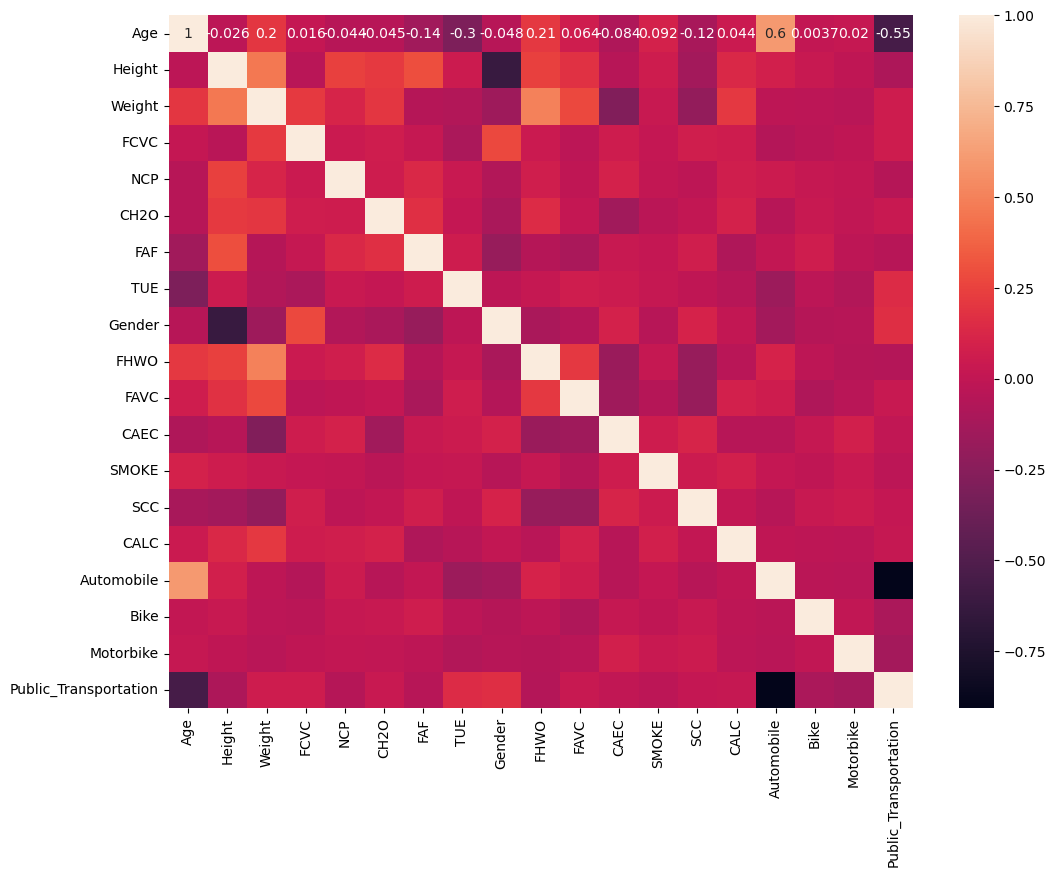

In [26]:
# Correlation Matrix

X = X.rename(columns={"family_history_with_overweight":"FHWO"})

corr_matrix = X.corr()

plt.figure(figsize = (12, 9))
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [28]:
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > 0.7:
            print(corr_matrix.columns[i], "|", corr_matrix.columns[j], "   ", corr_matrix.iloc[i, j])

Public_Transportation | Automobile     -0.9067167327361628


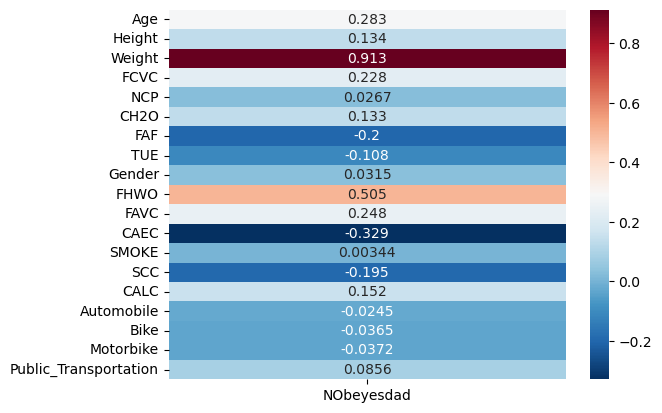

In [30]:
#Correlation between Features and Target

X_y = X.copy()
X_y['NObeyesdad'] = y

corr_matrix = X_y.corr()

corr_target = corr_matrix[['NObeyesdad']].drop(labels=['NObeyesdad'])

sns.heatmap(corr_target, annot=True, fmt='.3', cmap='RdBu_r')
plt.show()

# Gradient Boosting Implementation

In [33]:
grad_classifier = GradientBoostingClassifier()

In [35]:
grad_classifier.fit(X_train, y_train)
y_pred = grad_classifier.predict(X_test)

In [37]:
accuracy = accuracy_score(y_test, y_pred)

print(f'Test set accuracy:\t{accuracy}')

grad_classifier.n_estimators

Test set accuracy:	0.9337539432176656


100

In [39]:
test_conf_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred, labels=[1,0]), 
                                index = ['actual yes', 'actual no'], 
                                columns= ['predicted yes', 'predicted no'])
print(f'Confusion Matrix :\n{test_conf_matrix.to_string()}')

Confusion Matrix :
            predicted yes  predicted no
actual yes             95             2
actual no               2            91


In [41]:
np.random.seed(0)
accuracy_train = []
accuracy_test = []
estimators = range(1, 150)
for i in estimators:
    gbc = GradientBoostingClassifier(n_estimators = i)
    gbc.fit(X_train, y_train)
    y_pred = gbc.predict(X_test)
    accuracy_test.append(accuracy_score(y_test, gbc.predict(X_test)))
    accuracy_train.append(accuracy_score(y_train, gbc.predict(X_train)))

best_acc = np.max(accuracy_test)
best_estimators = estimators[np.argmax(accuracy_test)]
print(f'The highest accuracy on the test is achieved when the number of estimators: {best_estimators}')
print(f'The highest accuracy on the test set is: {round(best_acc*100,3)}%')

The highest accuracy on the test is achieved when the number of estimators: 146
The highest accuracy on the test set is: 94.795%


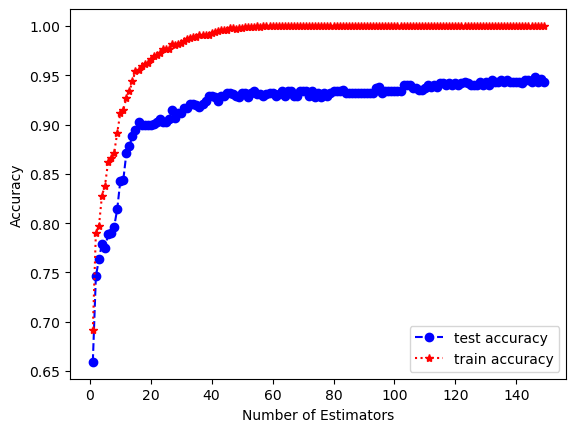

In [43]:
plt.figure()
plt.plot(estimators, accuracy_test, 'bo--', estimators, accuracy_train, 'r*:')
plt.legend(['test accuracy', 'train accuracy'])
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.show()

In [45]:
best_gbc = GradientBoostingClassifier(n_estimators = best_estimators)
best_gbc.fit(X_train, y_train)
feature_imp_df = pd.DataFrame(zip(X_train.columns, best_gbc.feature_importances_), columns=['Feature', 'Importance'])
print("Top 8 Gradient Boosting Features: ")
print(feature_imp_df.sort_values('Importance', ascending=False).iloc[0:8])

Top 8 Gradient Boosting Features: 
   Feature  Importance
2   Weight    0.551833
1   Height    0.111931
3     FCVC    0.100130
8   Gender    0.083698
0      Age    0.036365
14    CALC    0.020984
4      NCP    0.019977
5     CH2O    0.017270


<Axes: ylabel='Feature'>

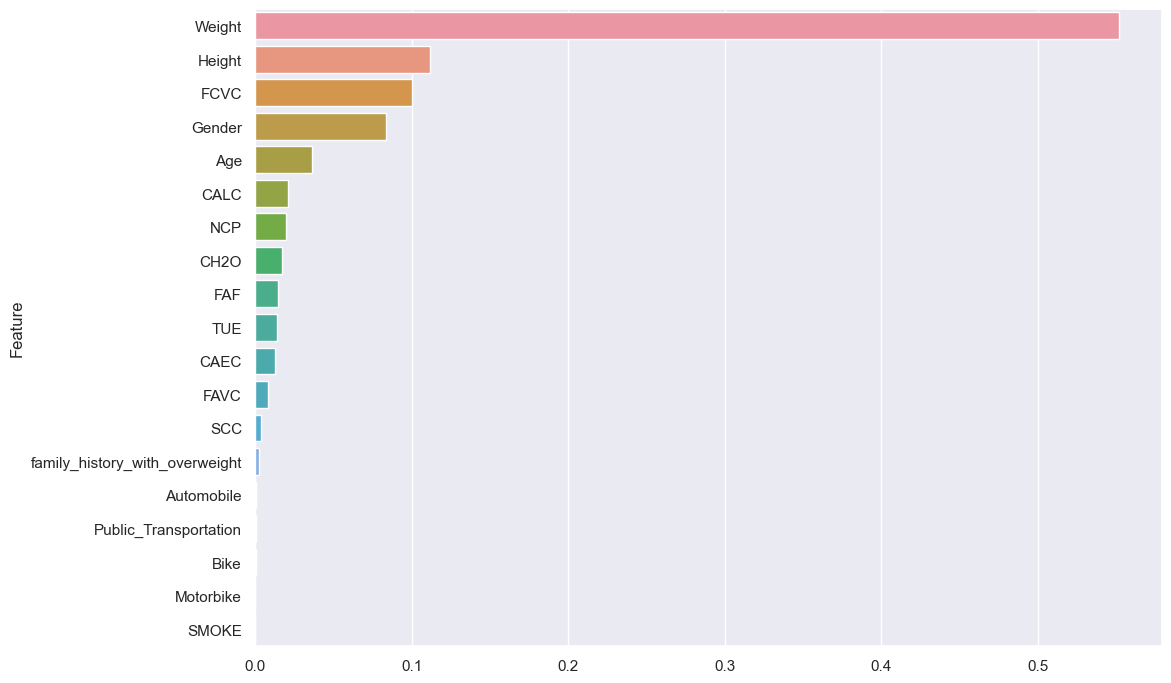

In [49]:
feature_importances = best_gbc.feature_importances_
sorted_indices = feature_importances.argsort()[::-1]
sorted_feature_names = feature_imp_df.Feature[sorted_indices]
sorted_importances = feature_importances[sorted_indices]

sns.set(rc={'figure.figsize':(11.7, 8.27)})
sns.barplot(x=sorted_importances, y=sorted_feature_names)

# Random Forest Classifier

In [51]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred)
print(f'Test set accuracy: {rf_accuracy}')

Test set accuracy: 0.9400630914826499


In [53]:
test_conf_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred, labels=[1,0]), 
                                index = ['actual yes', 'actual no'], 
                                columns= ['predicted yes', 'predicted no'])
print(f'Confusion Matrix :\n{test_conf_matrix.to_string()}')

Confusion Matrix :
            predicted yes  predicted no
actual yes             98             2
actual no               6            87


In [55]:
np.random.seed(0)
accuracy_train2 = []
accuracy_test2 = []
depths = range(1, 25)
for i in depths:
    rfc = RandomForestClassifier(max_depth = i)
    rfc.fit(X_train, y_train)
    y_pred = rfc.predict(X_test)
    accuracy_test2.append(accuracy_score(y_test, rfc.predict(X_test)))
    accuracy_train2.append(accuracy_score(y_train, rfc.predict(X_train)))

best_acc = np.max(accuracy_test2)
best_depth = depths[np.argmax(accuracy_test2)]
print(f'The highest accuracy on the test is achieved when the depth: {best_depth}')
print(f'The highest accuracy on the test set is: {round(best_acc*100,3)}%')

The highest accuracy on the test is achieved when the depth: 17
The highest accuracy on the test set is: 93.533%


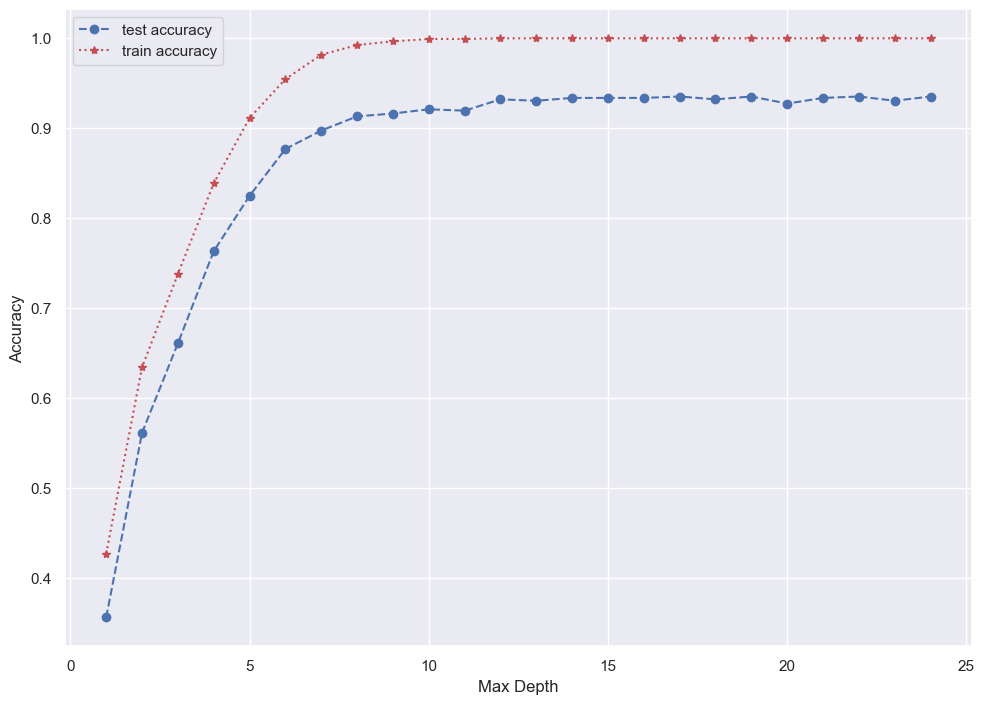

In [57]:
plt.figure()
plt.plot(depths, accuracy_test2, 'bo--', depths, accuracy_train2, 'r*:')
plt.legend(['test accuracy', 'train accuracy'])
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.show()

In [59]:
best_rfc = RandomForestClassifier(max_depth = best_depth)
best_rfc.fit(X_train, y_train)
feature_imp_df = pd.DataFrame(zip(X_train.columns, best_rfc.feature_importances_), columns=['Feature', 'Importance'])
print("Top 8 Random Forest Classifier Features: ")
print(feature_imp_df.sort_values('Importance', ascending=False).iloc[0:8])

Top 8 Random Forest Classifier Features: 
  Feature  Importance
2  Weight    0.330479
1  Height    0.095977
3    FCVC    0.093307
0     Age    0.090222
8  Gender    0.056632
4     NCP    0.056612
6     FAF    0.045666
7     TUE    0.043351


<Axes: ylabel='Feature'>

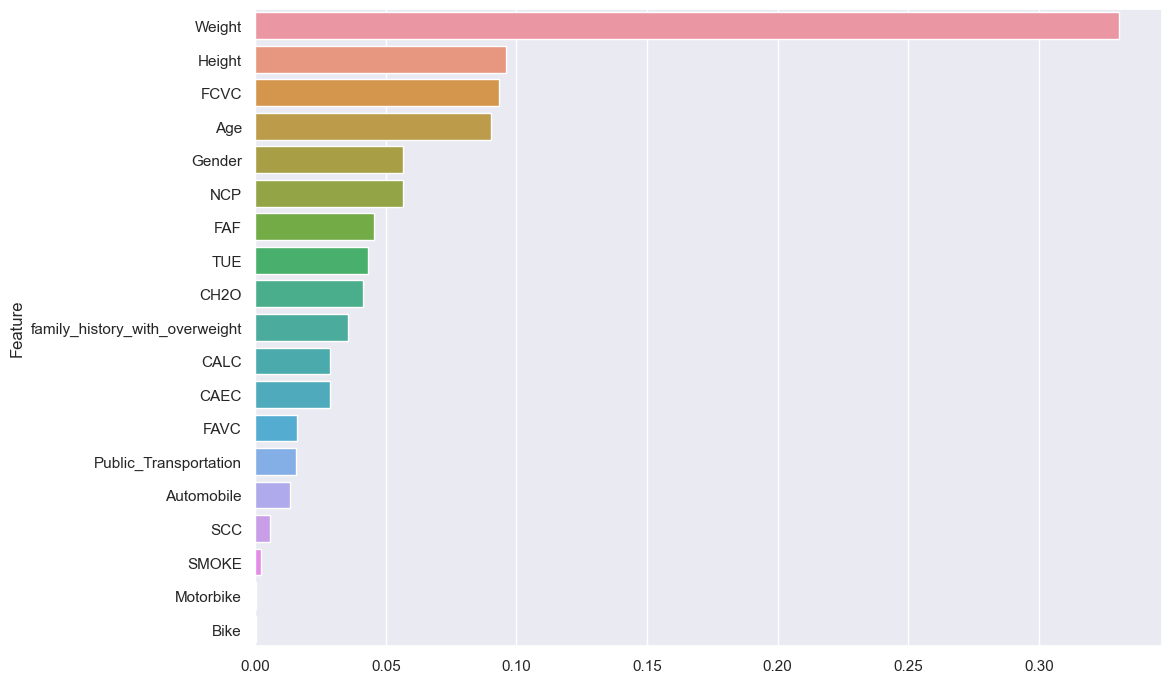

In [63]:
feature_importances = best_rfc.feature_importances_
sorted_indices = feature_importances.argsort()[::-1]
sorted_feature_names = feature_imp_df.Feature[sorted_indices]
sorted_importances = feature_importances[sorted_indices]

sns.set(rc={'figure.figsize':(11.7, 8.27)})
sns.barplot(x=sorted_importances, y=sorted_feature_names)